# Pregunta 1

- Un productor de avenas envasadas afirma que el peso promedio de cada caja de su producto es de 500 gramos. ¿Los datos que a continuación se le dan apoyan la afirmación del fabricante? Pruebe con alfa = 0.05, si la muestra presenta los siguientes datos:

##### 499,	508,	499,	503,	504,	510,	497,	512,   514,   505,	493,	496,	506,	502,	509,	496

## A.	HIPOTESIS DE INVESTIGACIÓN:

- H0: El peso promedio de cada caja de avena envasada es 500 gramos.
- H1: El peso promedio de cada caja de avena envasada NO es 500 gramos.

## B.	POBLACIONES

- La población es todas las cajas de avena envasada que realiza el productor.

## C.	MUESTRA

- Nivel de confianza = 1 - α = 95% = 0.95
- n = 16

## D.	SIGNIFICANCIA

- Error tipo I = α = 0.05 = 5%

## E.	DATOS

- Peso promedio de cada caja de avena envasada.
- Se adjunta en un arreglo de numpy

In [181]:
# Importación de librerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats as ss

In [182]:
# Carga de los datos con numpy
data = np.array([499, 508, 499, 503, 504, 510, 497, 512, 514, 505, 493, 496, 506, 502, 509, 496])
# Tamaño de la muestra
n = len(data)
# Media de la hipotesis
mean_hyp = 500
# Significancia
alpha = 0.05


print('Datos recolectados para el analisis de las hipotesis: ', data)

Datos recolectados para el analisis de las hipotesis:  [499 508 499 503 504 510 497 512 514 505 493 496 506 502 509 496]


## F.	HIPOTESIS ESTADISTICA

- Asumiendo la distribución de los datos sigue una distribución normal:

- H0:  μ = 500g             H. Nula
- H1:  μ ≠ 500g             H. Alterna

## G. TIPO DE PRUEBA

- Sera de doble cola porque H1 tiene el signo diferente:

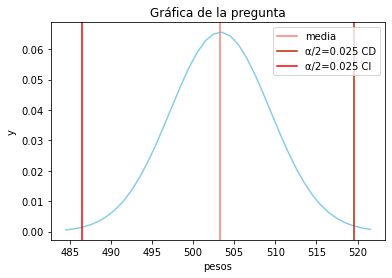

In [183]:
# Gráfica de referencia para las colas
mu, sigma = np.mean(data), np.std(data)

X = ss.norm(mu, sigma)

graph = np.arange(X.ppf(0.001), X.ppf(0.999))
plt.plot(graph, X.pdf(graph), c='skyblue')

tail_left = int(graph.size * 0.05) + 1
tail_right = int(graph.size * 0.95) - 1

plt.axvline(mu, c='salmon', label='media')
plt.axvline(graph[tail_right], c='#c02200', label='α/2=0.025 CD')
plt.axvline(graph[tail_left], c='#f80000', label='α/2=0.025 CI')

plt.title('Gráfica de la pregunta')
plt.ylabel('y')
plt.xlabel('pesos')

plt.legend()

## H.	ESTADISTICO DE PRUEBA

- No se conoce la desviación típica poblacional, por lo tanto, mi estadístico es:

- Formula: $$t = {{x ̅ - \mu} \over {s \over \sqrt n} }$$

In [141]:
def test_t(x, mu, std, n):
    
    return (x - mu) / (std / np.sqrt(n))

In [142]:
data = {
    'avenas_envasadas': data
}
data = pd.DataFrame(data)

data.describe()

,pesos_avenas_envasadas
count,16.000000
mean,503.312500
std,6.279265
min,493.000000
25%,498.500000
50%,503.500000
75%,508.250000
max,514.000000


In [143]:
# Calcular el "t" si no se conoce la desviación típica poblacional
t = test_t(mean_hyp, float(data.mean()), float(data.std()), n)
print('El estadistico de prueba "t" es:', t)

T de prueba es: -2.1101196369335726


In [184]:
# calculamos el p-valor por el t de prueba
p_value = ss.t.sf(np.abs(t), n - 1) * 2
print('El p-valor es: ', p_value)

El p-valor es:  0.052053882451790434


In [185]:
t, p_value = ss.ttest_1samp(data, 500)
print('El estadistico de prueba "t" es:', t)
print('El p-valor es: ', p_value)

El estadistico de prueba "t" es: 2.1101196369335726
El p-valor es:  0.052053882451790434


### Podemos respaldar nuestros datos con MegaStat de Excel

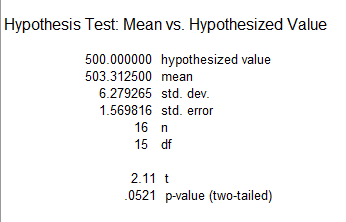

## J.	CONCLUSIÓN

- p-value > alpha
- 0.05205 > 0.05000 (Verdadero) No rechazo la Ho

- No hay suficiente evidencia en las muestras para no rechazar la hipotesis nula de que el peso promedio de las cajas de avena envasadas es de 500 gramos. A un nivel de confianza de 95%.
